In [23]:

import pandas as pd

In [6]:
# Load the dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, delimiter=';')  # The dataset is semicolon-separated

In [7]:
# Display the first few rows
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [8]:
# Concatenate the first 5 and last 5 rows
first_and_last = pd.concat([df.head(), df.tail()])

In [9]:
# Print the combined DataFrame
print(first_and_last)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0      

In [10]:
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
print(df.duplicated().sum())
df = df.drop_duplicates()


937


In [12]:
print("Duplicates after:", df.duplicated().sum())

Duplicates after: 0


In [13]:
# Check data types
print("Data types:\n", df.dtypes)


Data types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [14]:
# Describe the data before cleaning for a baseline
print("Summary statistics before cleaning:\n", df.describe())


Summary statistics before cleaning:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Set up the plotting style
sns.set(style="whitegrid")

C:\Users\Martin\AppData\Local\Temp\ipykernel_848\3731157405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette="viridis")


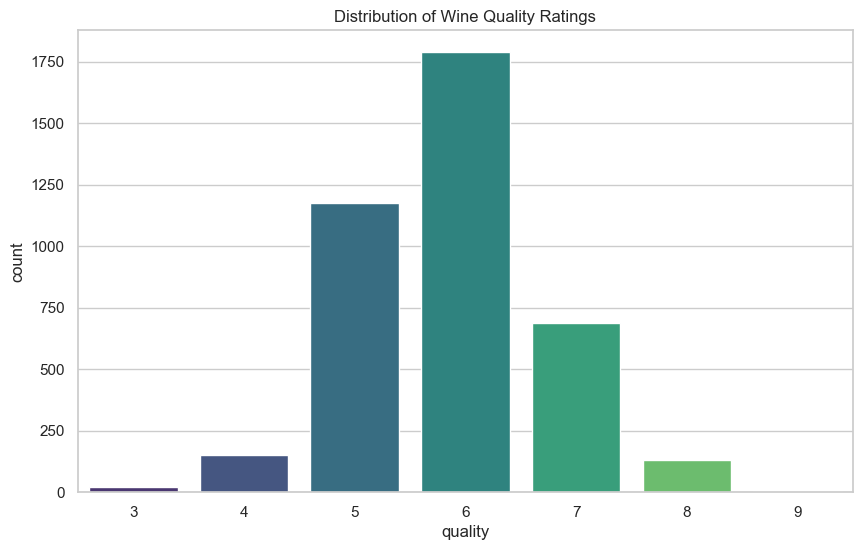

In [17]:
# Plot the distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette="viridis")
plt.title('Distribution of Wine Quality Ratings')
plt.show()

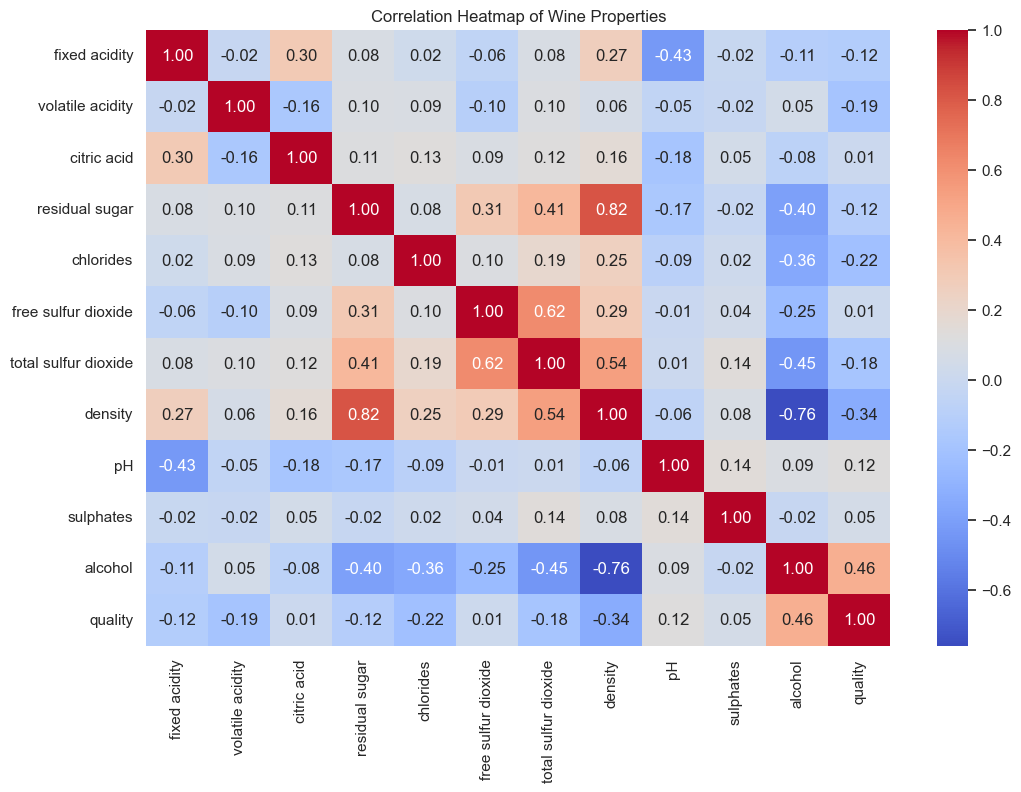

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Wine Properties')
plt.show()

C:\Users\Martin\AppData\Local\Temp\ipykernel_848\3554006762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette="coolwarm")


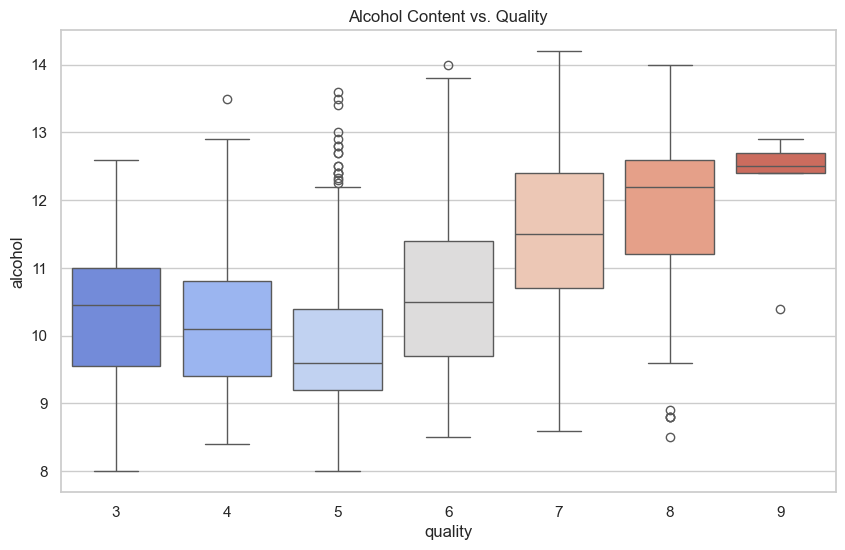

In [19]:
# Visualize relationships between some features and wine quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette="coolwarm")
plt.title('Alcohol Content vs. Quality')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define features and target
X = df.drop('quality', axis=1)
y = df['quality']


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.5208070617906684
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.29      0.07      0.11        30
           5       0.55      0.55      0.55       234
           6       0.51      0.70      0.59       349
           7       0.53      0.26      0.35       145
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00         0

    accuracy                           0.52       793
   macro avg       0.27      0.23      0.23       793
weighted avg       0.49      0.52      0.49       793



C:\Users\Adeena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Adeena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Adeena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Adeena\anaconda3\lib\site-packages\sklearn\metrics\

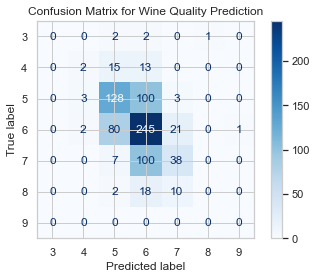

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for Wine Quality Prediction")
plt.show()


In [ ]:
print("Key Findings:\n")
print("- The wine quality distribution shows that most wines have a quality rating between 5 and 6.")
print("- The correlation heatmap reveals significant relationships between features, such as alcohol and quality.")
print(f"- Our Logistic Regression model achieved an accuracy of {accuracy:.2f}, indicating it has moderate predictive power.")


Key Findings:

- The wine quality distribution shows that most wines have a quality rating between 5 and 6.
- The correlation heatmap reveals significant relationships between features, such as alcohol and quality.
- Our Logistic Regression model achieved an accuracy of 0.52, indicating it has moderate predictive power.


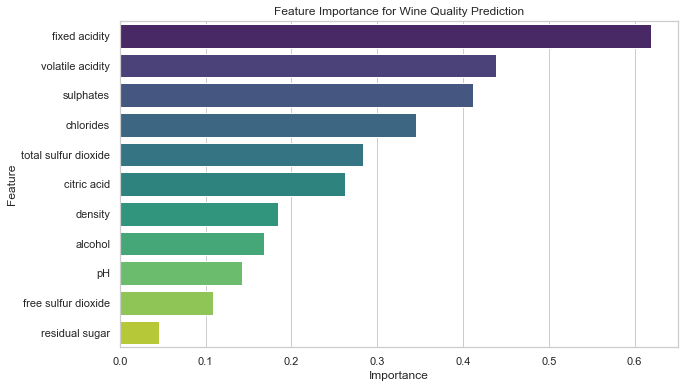

In [ ]:
feature_importance = abs(model.coef_[0])
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title('Feature Importance for Wine Quality Prediction')
plt.show()


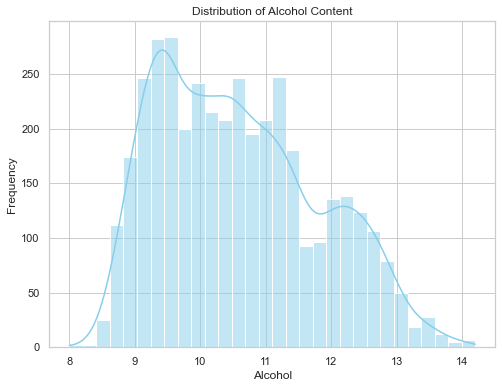

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Alcohol content
plt.figure(figsize=(8, 6))
sns.histplot(df['alcohol'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()


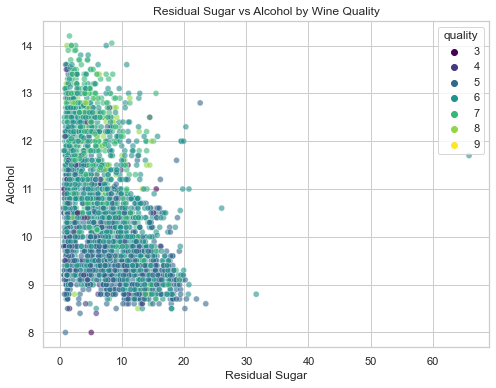

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='residual sugar', y='alcohol', hue='quality', data=df, palette='viridis', alpha=0.6)
plt.title('Residual Sugar vs Alcohol by Wine Quality')
plt.xlabel('Residual Sugar')
plt.ylabel('Alcohol')
plt.show()


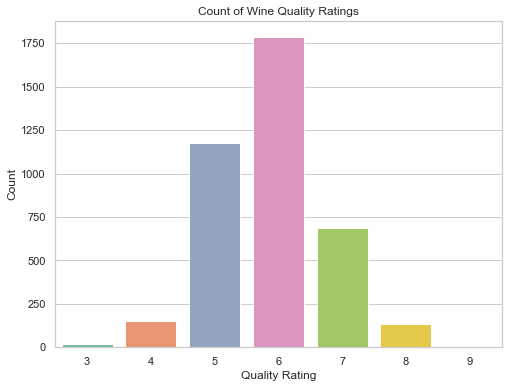

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='Set2')
plt.title('Count of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.show()


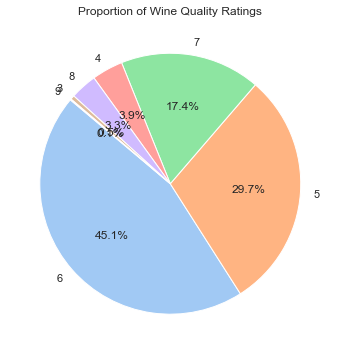

In [ ]:
quality_counts = df['quality'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Wine Quality Ratings')
plt.show()


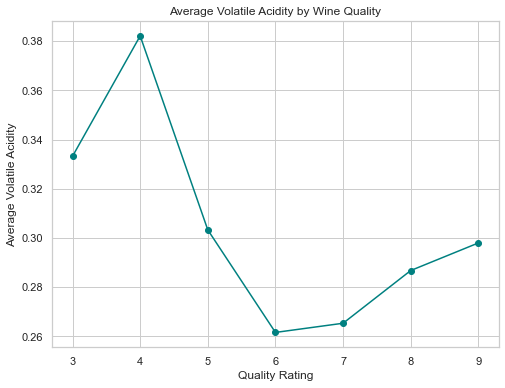

In [ ]:
average_volatile_acidity = df.groupby('quality')['volatile acidity'].mean()
plt.figure(figsize=(8, 6))
average_volatile_acidity.plot(kind='line', marker='o', color='teal')
plt.title('Average Volatile Acidity by Wine Quality')
plt.xlabel('Quality Rating')
plt.ylabel('Average Volatile Acidity')
plt.show()
